In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from scipy import stats

df = pd.read_csv('/content/cleaned_laptopData_alvi (1).csv')

In [ ]:
df.describe()

,Inches,Ram,Weight,Price,Price_log,Touchscreen,Ips,Screen_Width,Screen_Height,ppi,CPU_Speed,SSD,HDD,Flash,Hybrid
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,15.130448,8.457120,2.077677,704.420559,6.372256,0.145555,0.282455,1894.179386,1070.523997,146.017286,2.298206,182.678206,422.659323,4.594807,0.399685
std,1.955161,5.564752,0.808059,438.792124,0.623251,0.352798,0.450371,494.583499,284.624088,43.469379,0.507197,185.639027,527.452272,30.589977,14.249215
min,10.100000,1.000000,0.000200,109.020000,4.691531,0.000000,0.000000,1366.000000,768.000000,44.019462,0.900000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.500000,375.320000,5.927779,0.000000,0.000000,1600.000000,900.000000,127.335675,2.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,612.160000,6.416994,0.000000,0.000000,1920.000000,1080.000000,141.211998,2.500000,256.000000,0.000000,0.000000,0.000000
75%,15.600000,8.000000,2.320000,932.265000,6.837617,0.000000,1.000000,1920.000000,1080.000000,157.350512,2.700000,256.000000,1024.000000,0.000000,0.000000
max,35.600000,64.000000,11.100000,3821.470000,8.248390,1.000000,1.000000,3840.000000,2160.000000,352.465147,3.600000,1024.000000,2048.000000,512.000000,508.000000


In [ ]:
df.select_dtypes(include=np.number).mean()

,0
Inches,15.130448
Ram,8.457120
Weight,2.077677
Price,704.420559
Price_log,6.372256
Touchscreen,0.145555
Ips,0.282455
Screen_Width,1894.179386
Screen_Height,1070.523997
ppi,146.017286


**Pie Chart of Percentage of TouchScreen vs. Non-Touchscreen Laptops**

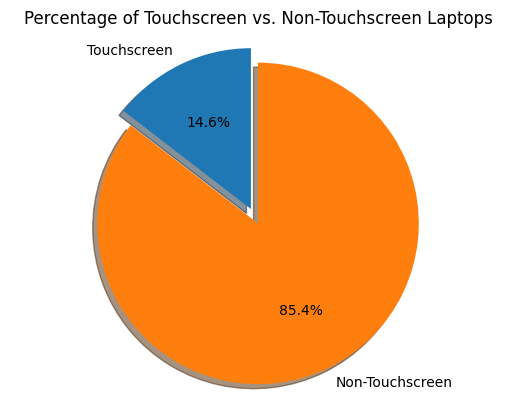

In [ ]:
# Pie chart of Percentage of Touchscreen vs. Non-Touchscreen Laptops
touchscreen_counts = df['Touchscreen'].value_counts()

# Create the pie chart
labels = ['Touchscreen', 'Non-Touchscreen']  # Updated labels
sizes = [touchscreen_counts.get(1, 0), touchscreen_counts.get(0, 0)] # Handle missing keys
explode = (0.1, 0)  # Explode the 1st slice (Touchscreen)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Touchscreen vs. Non-Touchscreen Laptops')
plt.show()

In [ ]:
# Count the number of touchScreen and non-touchScreen

touchscreen_counts = df['Touchscreen'].value_counts()
print("Number of Touchscreen laptops:", touchscreen_counts.get(1, 0))
print("Number of Non-Touchscreen laptops:", touchscreen_counts.get(0, 0))

Number of Touchscreen laptops: 185
Number of Non-Touchscreen laptops: 1086


**Percentage of Laptops by Company**

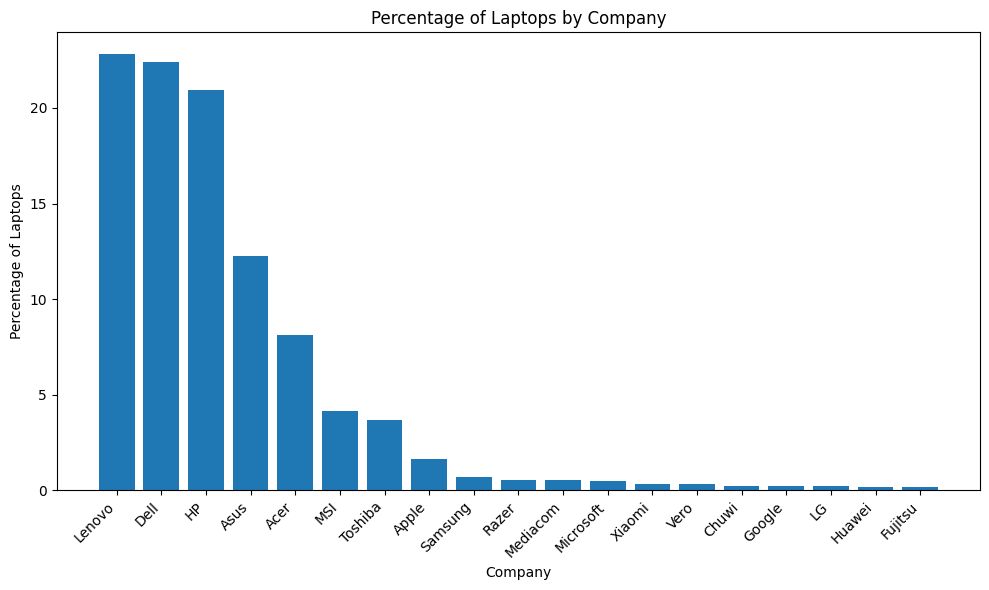

In [ ]:
# Bar chart of Percentage of Laptops by Company
company_counts = df['Company'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(company_counts.index, company_counts.values)
plt.xlabel("Company")
plt.ylabel("Percentage of Laptops")
plt.title("Percentage of Laptops by Company")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:

# Calculate the percentage and counts of laptops by company
company_counts = df['Company'].value_counts()
company_percentages = (company_counts / len(df)) * 100

# Create a DataFrame for the results
company_data = pd.DataFrame({
    'Company': company_counts.index,
    'Number of Laptops': company_counts.values,
    'Percentage of Laptops': company_percentages.values
})

# Display the table
company_data

,Company,Number of Laptops,Percentage of Laptops
0,Lenovo,290,22.816680
1,Dell,285,22.423289
2,HP,266,20.928403
3,Asus,156,12.273800
4,Acer,103,8.103855
5,MSI,53,4.169945
6,Toshiba,47,3.697876
7,Apple,21,1.652242
8,Samsung,9,0.708104
9,Razer,7,0.550747


**Mean Laptop Price By Company**

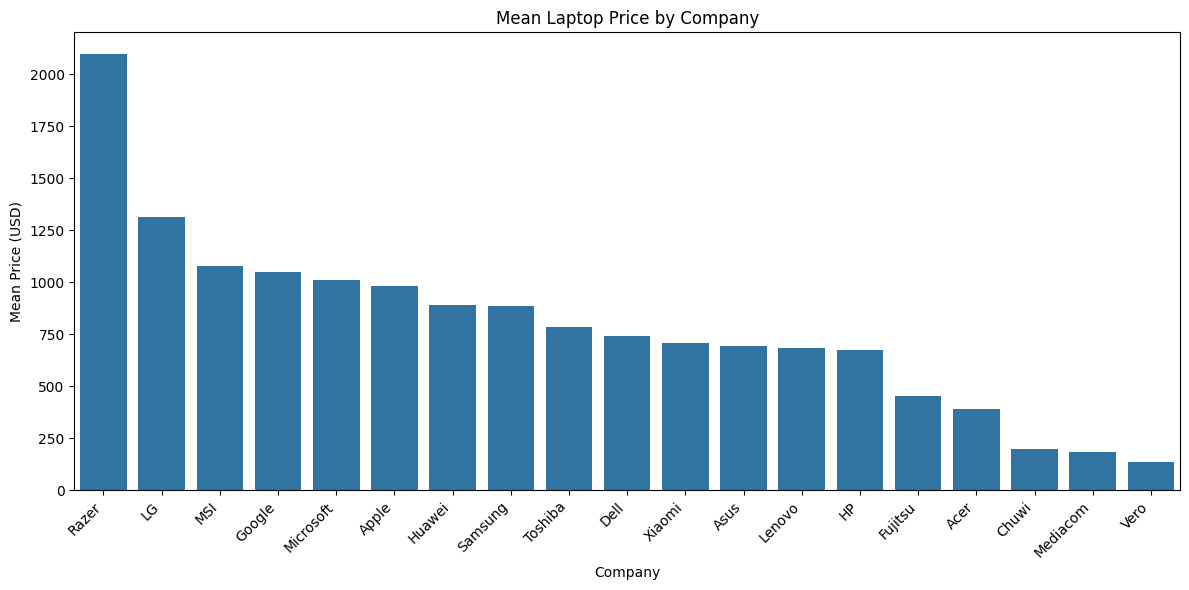

In [ ]:
# Calculate the mean price for each company
company_mean_prices = df.groupby('Company')['Price'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=company_mean_prices.index, y=company_mean_prices.values)
plt.xlabel("Company")
plt.ylabel("Mean Price (USD)")
plt.title("Mean Laptop Price by Company")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean price and count of laptops for each company
company_stats = df.groupby('Company')['Price'].agg(['mean', 'count'])

# Rename the columns for better readability
company_stats = company_stats.rename(columns={'mean': 'Mean Price (USD)', 'count': 'Number of Laptops'})

# Sort the table by mean price in descending order
company_stats = company_stats.sort_values(by='Mean Price (USD)', ascending=False)

# Display the table
company_stats

,Mean Price (USD),Number of Laptops
Company,,
Razer,2096.600000,7
LG,1315.176667,3
MSI,1079.739434,53
Google,1051.180000,3
Microsoft,1010.228333,6
Apple,980.084286,21
Huawei,892.240000,2
Samsung,885.625556,9
Toshiba,784.948936,47


**Percentage of Laptops By Type**

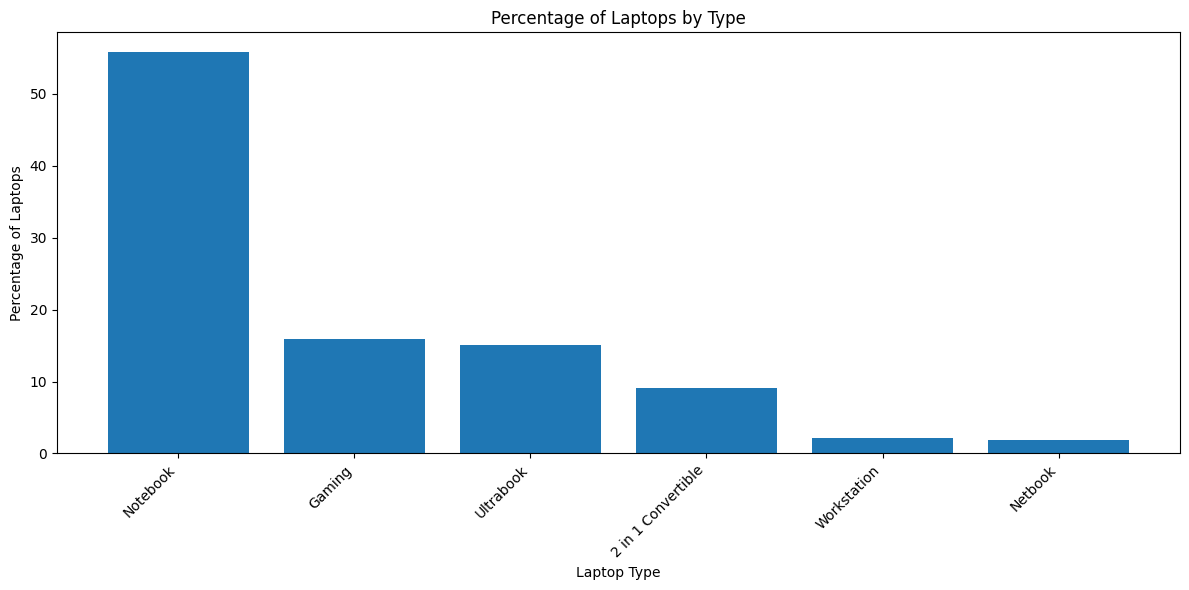

In [ ]:
#bar chart of Percentage of Laptops by Type
typename_counts = df['TypeName'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
plt.bar(typename_counts.index, typename_counts.values)
plt.xlabel("Laptop Type")
plt.ylabel("Percentage of Laptops")
plt.title("Percentage of Laptops by Type")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Calculate the percentage and counts of laptops by type
typename_counts = df['TypeName'].value_counts()
typename_percentages = (typename_counts / len(df)) * 100

# Create a DataFrame for the results
typename_data = pd.DataFrame({
    'TypeName': typename_counts.index,
    'Number of Laptops': typename_counts.values,
    'Percentage of Laptops': typename_percentages.values
})

# Display the table
typename_data

,TypeName,Number of Laptops,Percentage of Laptops
0,Notebook,709,55.782848
1,Gaming,203,15.971676
2,Ultrabook,191,15.027537
3,2 in 1 Convertible,116,9.126672
4,Workstation,28,2.202990
5,Netbook,24,1.888277


**Mean PPI by Laptop Type**

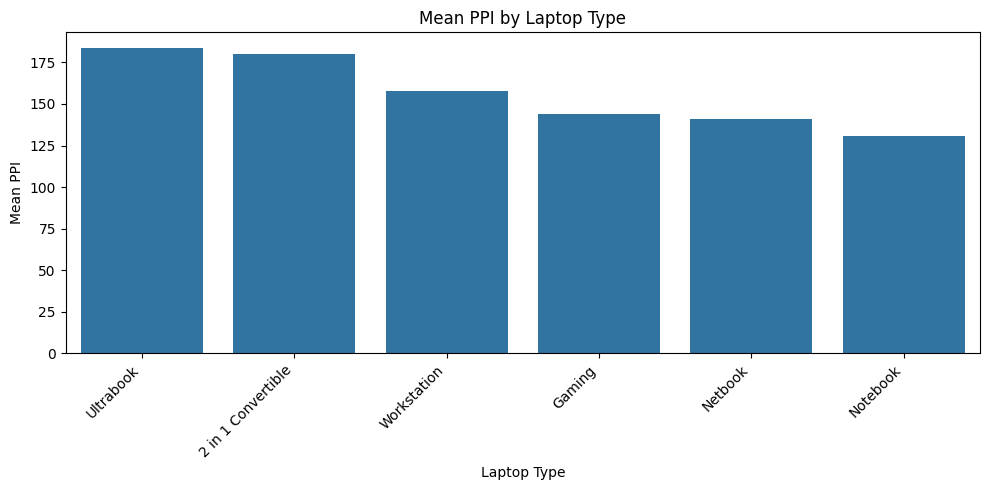

In [ ]:
# Group by 'TypeName' and calculate the mean PPI
ppi_by_type = df.groupby('TypeName')['ppi'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=ppi_by_type.index, y=ppi_by_type.values)
plt.xlabel("Laptop Type")
plt.ylabel("Mean PPI")
plt.title("Mean PPI by Laptop Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean PPI and count of laptops for each type
type_stats = df.groupby('TypeName')['ppi'].agg(['mean', 'count'])

# Rename the columns for better readability
type_stats = type_stats.rename(columns={'mean': 'Mean PPI', 'count': 'Number of Laptops'})

# Sort the table by mean PPI in descending order
type_stats = type_stats.sort_values(by='Mean PPI', ascending=False)

# Display the table
type_stats

,Mean PPI,Number of Laptops
TypeName,,
Ultrabook,183.841621,191
2 in 1 Convertible,179.888882,116
Workstation,157.653692,28
Gaming,143.959681,203
Netbook,141.140040,24
Notebook,130.580579,709


In [ ]:
#this is to check how many company's laptops have IPS in this dataset

# Filter for laptops with IPS panels
ips_laptops = df[df['Ips'] == True]

# Group by company and count the number of IPS laptops
ips_counts = ips_laptops.groupby('Company')['Ips'].count()

# Print the results
for company, count in ips_counts.items():
    print(f"{company} has {count} IPS laptops")

Acer has 35 IPS laptops
Apple has 16 IPS laptops
Asus has 29 IPS laptops
Chuwi has 1 IPS laptops
Dell has 44 IPS laptops
HP has 55 IPS laptops
Huawei has 2 IPS laptops
LG has 3 IPS laptops
Lenovo has 138 IPS laptops
MSI has 7 IPS laptops
Mediacom has 5 IPS laptops
Razer has 1 IPS laptops
Samsung has 1 IPS laptops
Toshiba has 17 IPS laptops
Vero has 1 IPS laptops
Xiaomi has 4 IPS laptops


<ipython-input-35-8d95e5cdb1e5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [ips_counts.get(1, 0), ips_counts.get(0, 0)] # Handle missing keys


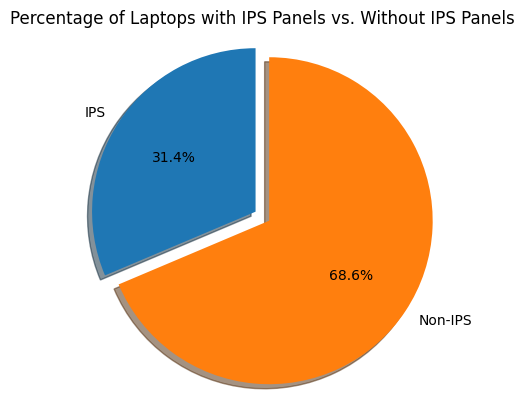

In [ ]:
# Pie chart of Percentage of Laptops with IPS Panels vs. Without IPS Panels
touchscreen_counts = df['Ips'].value_counts()

# Create the pie chart
labels = ['IPS', 'Non-IPS']  # Updated labels
sizes = [ips_counts.get(1, 0), ips_counts.get(0, 0)] # Handle missing keys
explode = (0.1, 0)  # Explode the 1st slice (IPS)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Laptops with IPS Panels vs. Without IPS Panels')
plt.show()

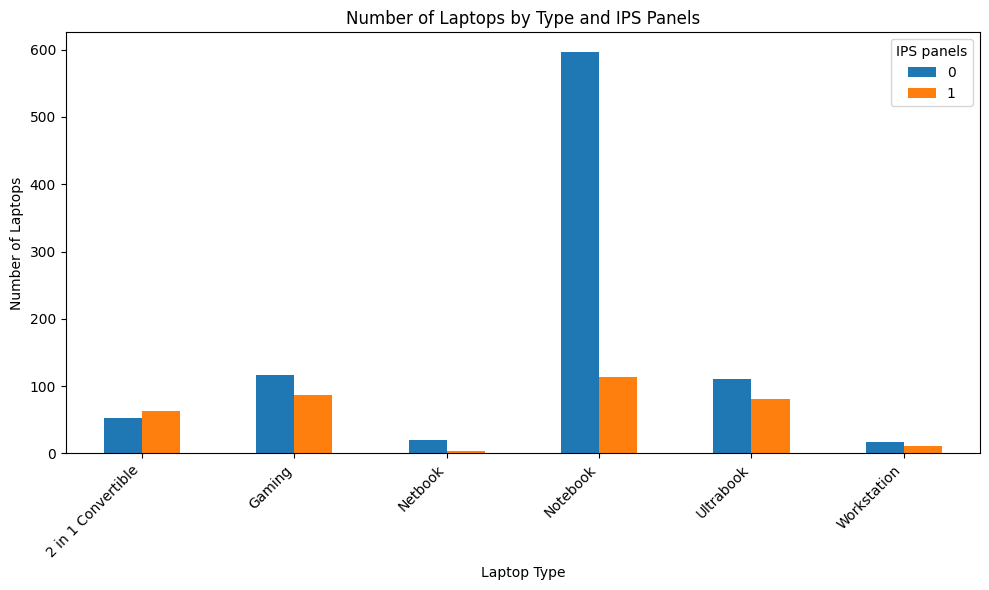

In [ ]:
# Group by 'TypeName' and count the occurrences of each IPS
ip_counts_by_type = df.groupby('TypeName')['Ips'].value_counts().unstack(fill_value=0)


# Plot the bar chart
ip_counts_by_type.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Laptop Type")
plt.ylabel("Number of Laptops")
plt.title("Number of Laptops by Type and IPS Panels")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='IPS panels')
plt.show()

In [ ]:
from tabulate import tabulate

# Creating a new DataFrame for the statistics
stats = df.groupby('TypeName').agg(
    total_laptops=('TypeName', 'size'),
    ips_count=('Ips', lambda x: (x == True).sum()),
    non_ips_count=('Ips', lambda x: (x == False).sum())
).reset_index()

# Calculate percentages
stats['ips_percentage'] = (stats['ips_count'] / stats['total_laptops']) * 100
stats['non_ips_percentage'] = (stats['non_ips_count'] / stats['total_laptops']) * 100

# Format percentages to two decimal places
stats['ips_percentage'] = stats['ips_percentage'].map('{:.2f}%'.format)
stats['non_ips_percentage'] = stats['non_ips_percentage'].map('{:.2f}%'.format)

# Rename columns for clarity
stats.rename(columns={
    'TypeName': 'Laptop Type',
    'total_laptops': 'Total Laptops',
    'ips_count': 'Laptops with IPS',
    'ips_percentage': 'Percentage with IPS (%)',
    'non_ips_count': 'Laptops without IPS',
    'non_ips_percentage': 'Percentage without IPS (%)'
}, inplace=True)

# Sort by 'Percentage with IPS (%)' in descending order
stats.sort_values(by='Percentage with IPS (%)', ascending=False, inplace=True)

# Display the resulting DataFrame as a nicely formatted table
print(tabulate(stats, headers='keys', tablefmt='grid', showindex=False))


+--------------------+-----------------+--------------------+-----------------------+---------------------------+------------------------------+
| Laptop Type        |   Total Laptops |   Laptops with IPS |   Laptops without IPS | Percentage with IPS (%)   | Percentage without IPS (%)   |
+====================+=================+====================+=======================+===========================+==============================+
| 2 in 1 Convertible |             116 |                 63 |                    53 | 54.31%                    | 45.69%                       |
+--------------------+-----------------+--------------------+-----------------------+---------------------------+------------------------------+
| Gaming             |             203 |                 87 |                   116 | 42.86%                    | 57.14%                       |
+--------------------+-----------------+--------------------+-----------------------+---------------------------+-----------------

**Correlation Heatmap**

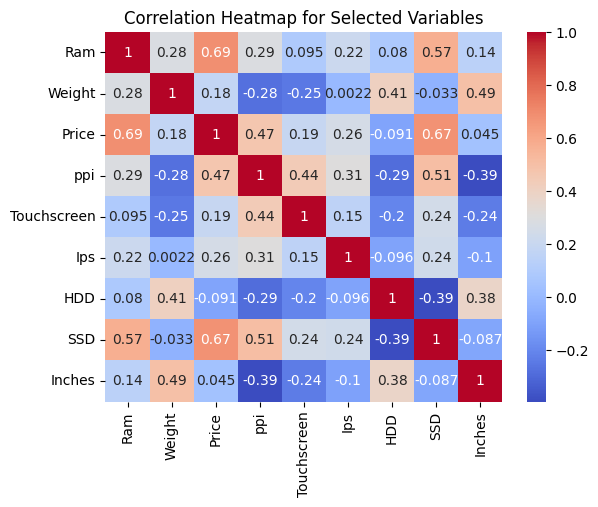

In [ ]:
selected_columns = ['Ram', 'Weight', 'Price', 'ppi', 'Touchscreen', 'Ips', 'HDD', 'SSD', 'Inches']
corr = df[selected_columns].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Variables')
plt.show()


From the correlation heatmap,
1. Positive Correlation:

*   RAM and Price (correlation = 0.69): Higher RAM is associated with a higher price.
*   SSD and Price (correlation = 0.67): As the SSD size increases, the price tends to increase.



-----------------------------------------------------------------------------

Other Observations:

Touchscreen: Weak correlations which means that having a touchscreen doesn't strongly impact the Price of the laptop.





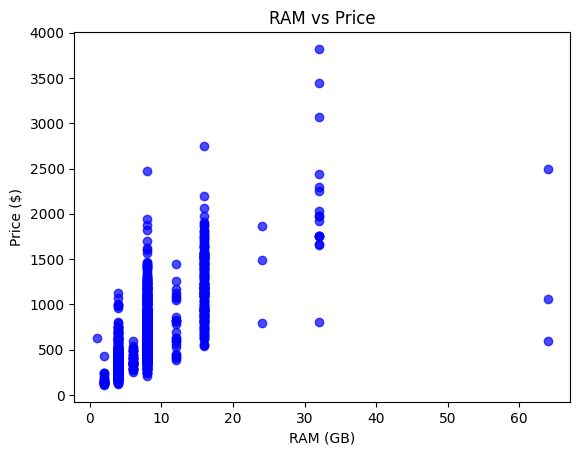

In [ ]:
plt.scatter(df['Ram'], df['Price'], alpha=0.7, color='blue')
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price ($)')
plt.show()
#can't use (need to delete after that)

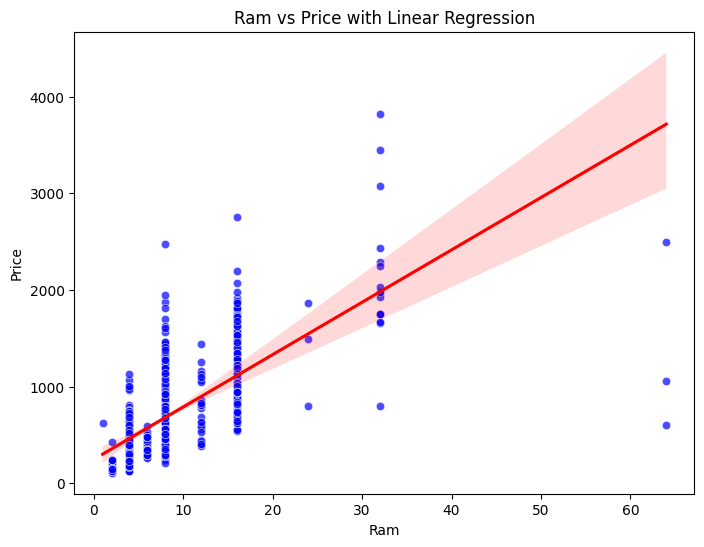

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing laptop data

# 1. Select your dependent and independent variables
x_column = 'Ram'  # Replace with your independent variable column name
y_column = 'Price'  # Replace with your dependent variable column name

# 2. Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x=x_column, y=y_column, data=df, alpha=0.7, color='blue')
plt.title(f'{x_column} vs {y_column} with Linear Regression')
plt.xlabel(x_column)
plt.ylabel(y_column)

# 3. Calculate and plot the regression line
sns.regplot(x=x_column, y=y_column, data=df, scatter=False, color='red')

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['Ram'].values.reshape(-1, 1)
y = df['Price']
model = LinearRegression().fit(X, y)
print(f"Coefficient: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}")


Coefficient: 54.18, Intercept: 246.23


**CPU Generation vs Price_Log**

       Processor CPU_Generation
0  Intel Core i5             i5
1  Intel Core i5             i5
2  Intel Core i5             i5
3  Intel Core i7             i7
4  Intel Core i5             i5


<ipython-input-42-8fe4716a3e46>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CPU_Generation', y='Price_log', data=df, order=order, palette='viridis')


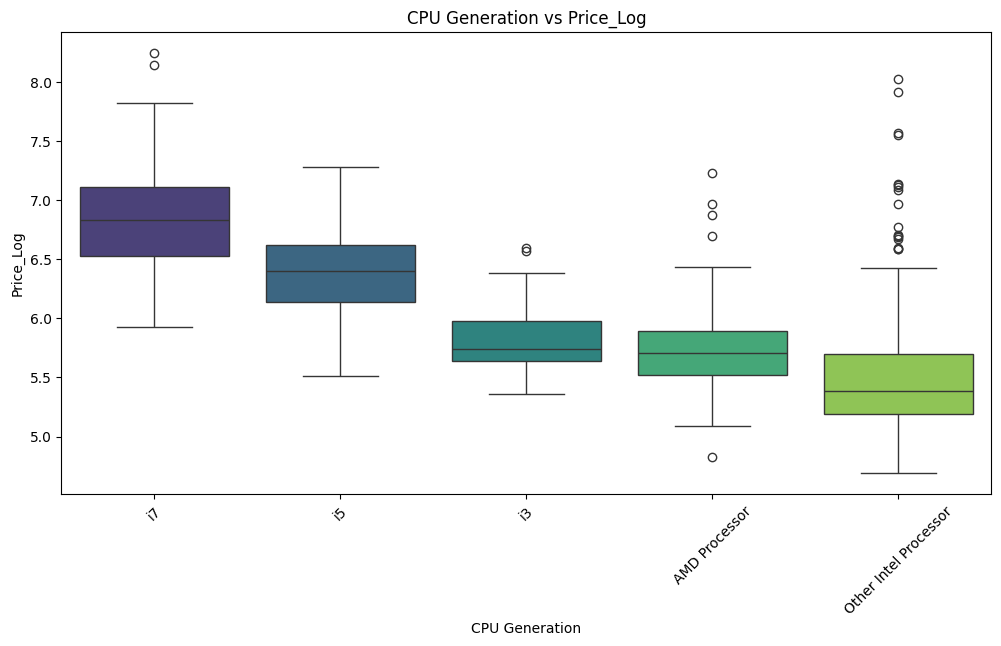

In [ ]:
# Function to extract CPU generation from Processor name
def extract_cpu_generation(processor):
    processor = processor.lower()
    if 'i7' in processor:
        return 'i7'
    elif 'i5' in processor:
        return 'i5'
    elif 'i3' in processor:
        return 'i3'
    elif 'amd' in processor:
        return 'AMD Processor'
    else:
        return 'Other Intel Processor'

# Apply the function to create a new column for CPU generation
df['CPU_Generation'] = df['Processor'].apply(extract_cpu_generation)

# Display the first few rows to check the new column
print(df[['Processor', 'CPU_Generation']].head())

# Define the order for CPU_Generation categories
order = ['i7', 'i5', 'i3', 'AMD Processor', 'Other Intel Processor']

# Visualize the correlation between CPU generation and Price_log
plt.figure(figsize=(12, 6))
sns.boxplot(x='CPU_Generation', y='Price_log', data=df, order=order, palette='viridis')
plt.title('CPU Generation vs Price_Log')
plt.xlabel('CPU Generation')
plt.ylabel('Price_Log')
plt.xticks(rotation=45)
plt.show()



In [ ]:
import statsmodels.api as sm

# Create the regression model
X = df[['CPU_Speed']]
y = df['Price_log']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     428.3
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           3.22e-82
Time:                        18:52:41   Log-Likelihood:                -1017.2
No. Observations:                1271   AIC:                             2038.
Df Residuals:                    1269   BIC:                             2049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9536      0.070     70.568      0.0

**Impact of CPU Clock Speed on Price_log**

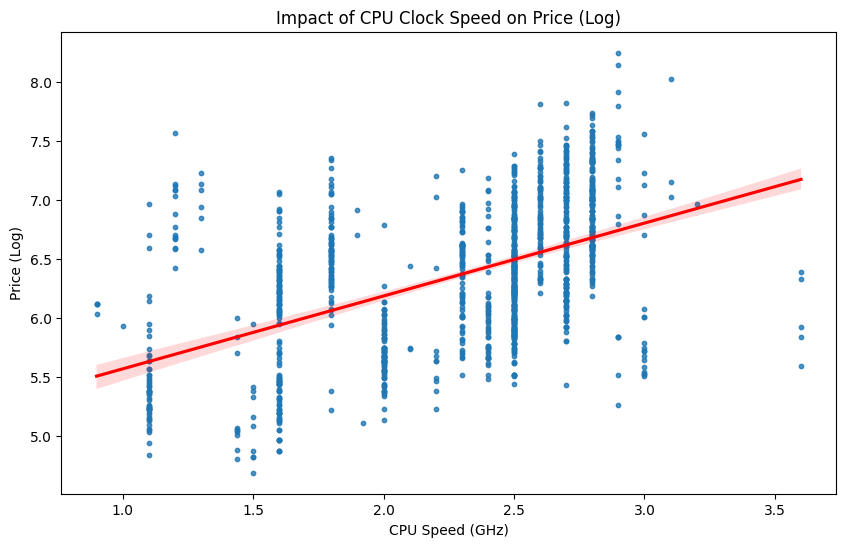

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='CPU_Speed', y='Price_log', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Impact of CPU Clock Speed on Price (Log)')
plt.xlabel('CPU Speed (GHz)')
plt.ylabel('Price (Log)')
plt.show()


**Distribution of Log_Prices by Laptop Type and Processor Type**

In [ ]:
# Combine 'TypeName' and 'Processor' into a new column
df['Laptop_Processor_Type'] = df['TypeName'] + ', ' + df['Processor']

# Extract 'TypeName' and 'Processor' into separate columns
df['TypeName'] = df['Laptop_Processor_Type'].apply(lambda x: x.split(', ')[0])
df['Processor'] = df['Laptop_Processor_Type'].apply(lambda x: x.split(', ')[1])

# Sort the DataFrame based on 'TypeName' and 'Processor'
df_sorted = df.sort_values(by=['TypeName', 'Processor'])

# Combine 'TypeName' and 'Processor' into a new column again
df_sorted['Laptop_Processor_Type_Sorted'] = df_sorted['TypeName'] + ', ' + df_sorted['Processor']


<ipython-input-46-cce4acca5717>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Laptop_Processor_Type_Sorted', y='Price_log', data=df_sorted, palette='Set3')


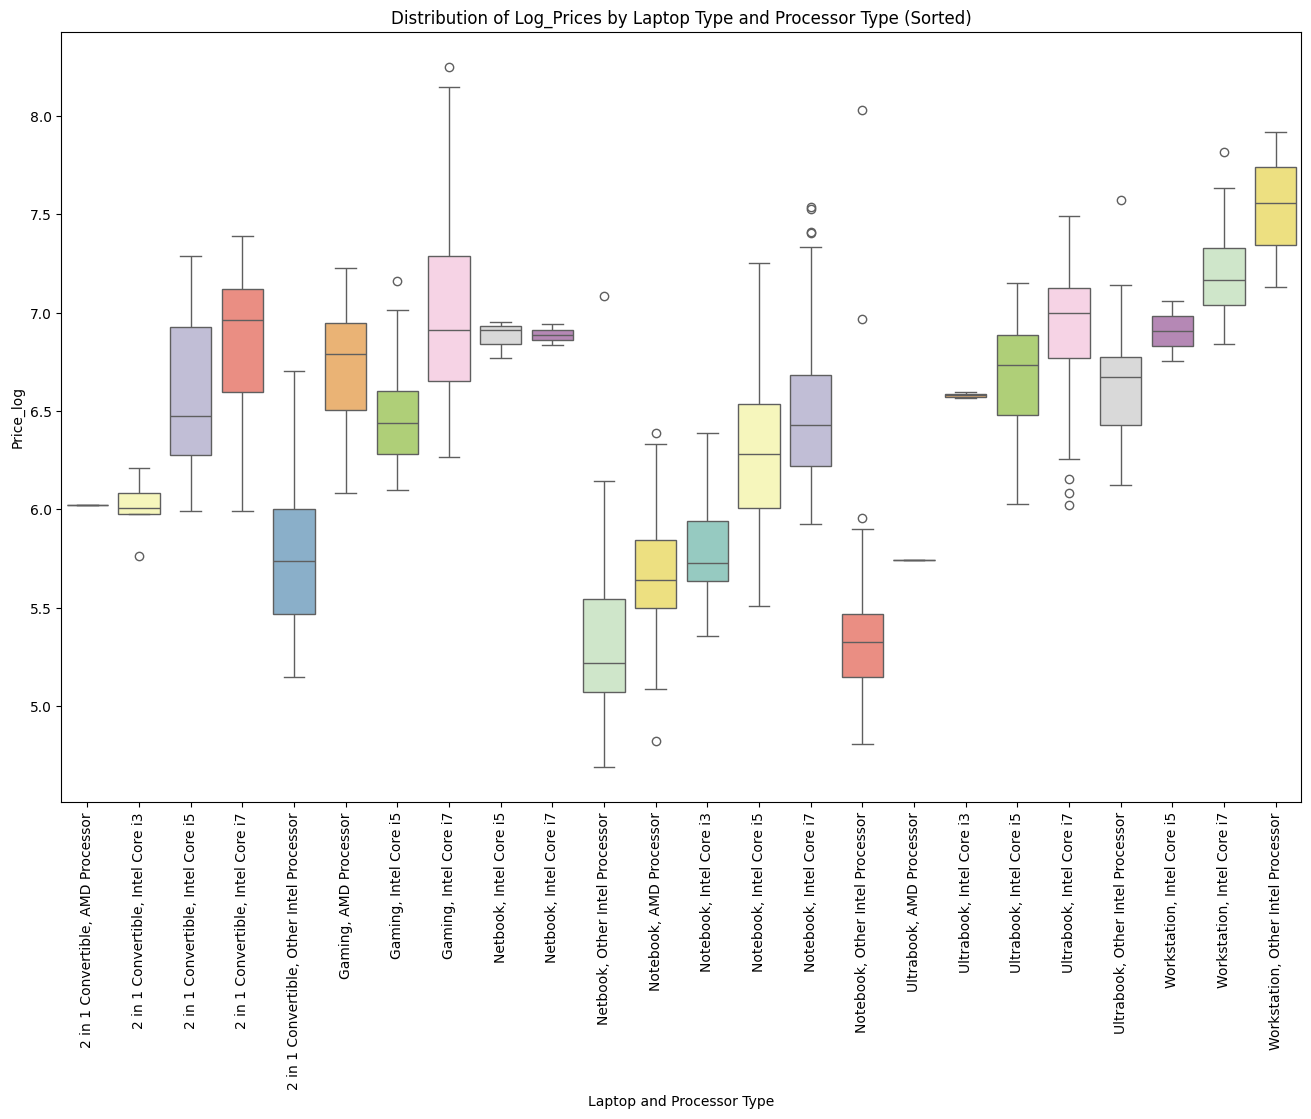

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(16, 10))

# Create the box plot using the sorted 'Laptop_Processor_Type_Sorted'
sns.boxplot(x='Laptop_Processor_Type_Sorted', y='Price_log', data=df_sorted, palette='Set3')

# Set plot title and labels
plt.title('Distribution of Log_Prices by Laptop Type and Processor Type (Sorted)')
plt.xlabel('Laptop and Processor Type')
plt.ylabel('Price_log')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


**Questions**

1. Does having a Touchscreen significantly increase the price?


In [ ]:
# Calculate mean prices
mean_price_touchscreen = df[df['Touchscreen'] == 1]['Price'].mean()
mean_price_non_touchscreen = df[df['Touchscreen'] == 0]['Price'].mean()

# Calculate mean price_log
mean_price_log_touchscreen = df[df['Touchscreen'] == 1]['Price_log'].mean()
mean_price_log_non_touchscreen = df[df['Touchscreen'] == 0]['Price_log'].mean()

print(f"Mean price for laptops with touchscreen: {mean_price_touchscreen}")
print(f"Mean price for laptops without touchscreen: {mean_price_non_touchscreen}")
print(f"Mean price_log for laptops with touchscreen: {mean_price_log_touchscreen}")
print(f"Mean price_log for laptops without touchscreen: {mean_price_log_non_touchscreen}")

Mean price for laptops with touchscreen: 906.2200540540541
Mean price for laptops without touchscreen: 670.0440331491712
Mean price_log for laptops with touchscreen: 6.6684023484281365
Mean price_log for laptops without touchscreen: 6.321806937633534


<ipython-input-48-a4b52fd1e0b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Touchscreen', y='Price_log', data=df, palette='Set2')


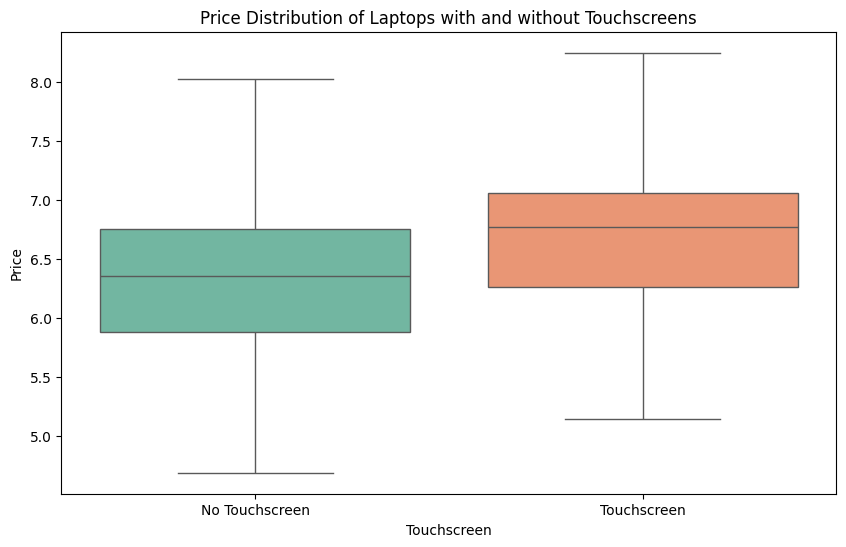

In [ ]:
# Box plot for touchscreen vs non-touchscreen prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='Touchscreen', y='Price_log', data=df, palette='Set2')
plt.title('Price Distribution of Laptops with and without Touchscreens')
plt.xlabel('Touchscreen')
plt.ylabel('Price')
plt.xticks([0, 1], ['No Touchscreen', 'Touchscreen'])
plt.show()


2. How does the price-to-performance ratio differ among brands?



Average Price-to-Performance Ratio by Brand:
Company
Vero          339.960202
Mediacom      444.026046
Chuwi         457.876418
Acer          574.078158
Fujitsu       595.358261
Asus          839.404602
Lenovo        839.784822
HP            892.268552
Dell          936.460863
Toshiba       950.838121
Samsung       984.790485
Xiaomi       1005.082835
Huawei       1052.448620
MSI          1111.730507
Microsoft    1205.925397
Apple        1423.624764
LG           1659.934667
Razer        1861.631957
Google       2042.969091
Name: Price_to_Performance_Ratio, dtype: float64


<ipython-input-49-c60f40b3dd97>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_to_performance.index, y=avg_price_to_performance.values, palette='viridis')


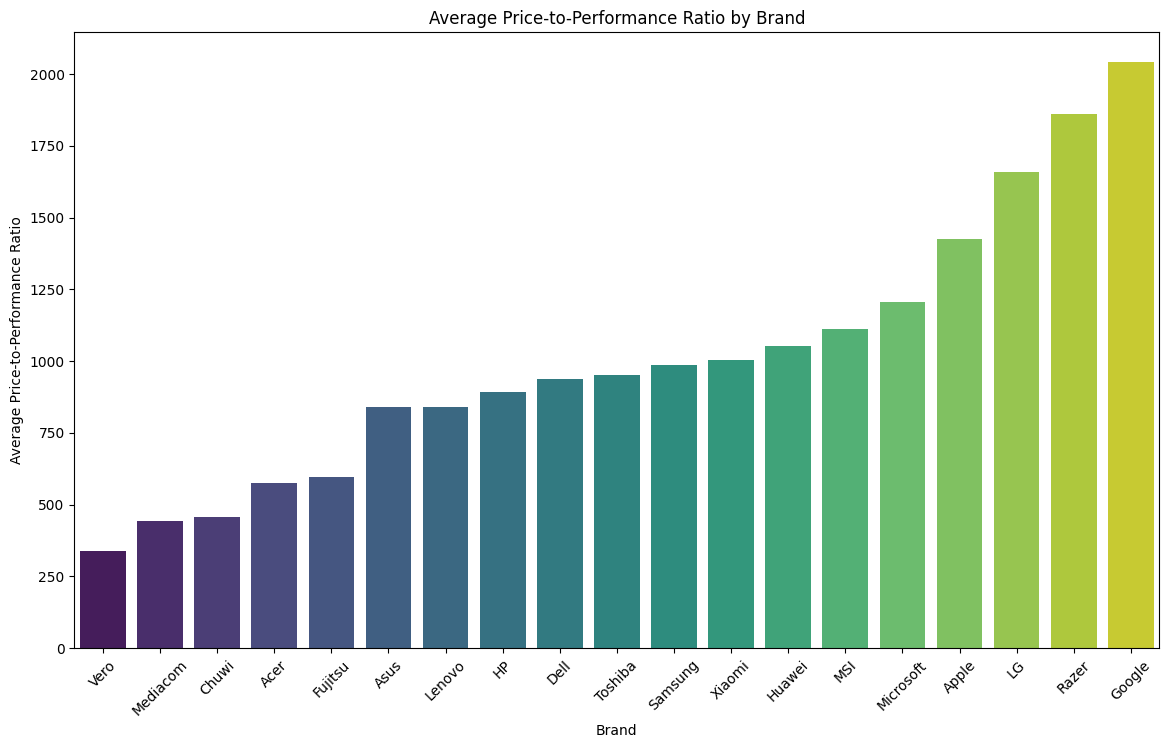

In [ ]:
# Create a composite performance score (example: simple sum of normalized metrics)
df['Performance_Score'] = (df['CPU_Speed'] / df['CPU_Speed'].max()) + (df['Ram'] / df['Ram'].max())

# Calculate the price-to-performance ratio
df['Price_to_Performance_Ratio'] = df['Price'] / df['Performance_Score']

# Group by brand and compute average price-to-performance ratio
avg_price_to_performance = df.groupby('Company')['Price_to_Performance_Ratio'].mean().sort_values()

print("Average Price-to-Performance Ratio by Brand:")
print(avg_price_to_performance)

# Plot the average price-to-performance ratio by brand
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_price_to_performance.index, y=avg_price_to_performance.values, palette='viridis')
plt.title('Average Price-to-Performance Ratio by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price-to-Performance Ratio')
plt.xticks(rotation=45)
plt.show()


3. Are lighter laptops more expensive?


<ipython-input-50-a5fb0ec48b1e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_log_by_weight = df.groupby('Weight_Category')['Price'].mean().reset_index()
<ipython-input-50-a5fb0ec48b1e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight_Category', y='Price', data=mean_price_log_by_weight, palette='Set3')


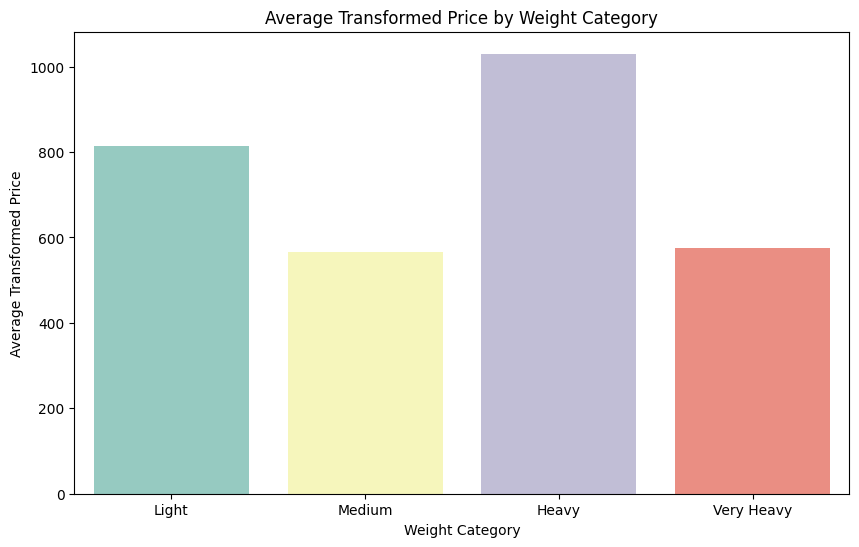

In [ ]:
# Create weight bins
weight_bins = pd.cut(df['Weight'], bins=[0, 1.5, 2.5, 5, 12], labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])

# Add the weight bins to the DataFrame
df['Weight_Category'] = weight_bins

# Calculate the mean Price_log for each weight category
mean_price_log_by_weight = df.groupby('Weight_Category')['Price'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Weight_Category', y='Price', data=mean_price_log_by_weight, palette='Set3')
plt.title('Average Transformed Price by Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Average Transformed Price')
plt.show()


In [ ]:
# Sort the DataFrame by 'Weight' in descending order and get the top 5
heaviest_laptops = df.sort_values(by='Weight', ascending=False).head(5)

# Display the heaviest 5 laptops
print(heaviest_laptops[['Company', 'TypeName', 'Weight']])

    Company   TypeName  Weight
613    Asus  Ultrabook   11.10
573  Lenovo  Ultrabook    8.40
317    Acer   Notebook    8.23
232  Lenovo   Notebook    7.20
128    Acer   Notebook    7.20


In [ ]:
correlation = df['Weight'].corr(df['Price'])
print(f"Correlation between Weight and Price: {correlation:.2f}")


Correlation between Weight and Price: 0.18


In [ ]:
x = df[['Weight']]
y = df['Price']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     40.89
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           2.26e-10
Time:                        18:52:44   Log-Likelihood:                -9515.6
No. Observations:                1271   AIC:                         1.904e+04
Df Residuals:                    1269   BIC:                         1.905e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.0927     33.446     15.102      0.0

4. Is there a correlation between processor brand (Intel vs AMD) and price?


In [ ]:
# Convert relevant columns to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Processor'] = df['Processor'].str.lower()

# Create a new column for processor brand
df['Processor_Brand'] = df['Processor'].apply(lambda x: 'Intel' if 'intel' in x else 'AMD' if 'amd' in x else 'Other')

# Drop rows with NaN values in relevant columns
#df.dropna(subset=['Price', 'Processor_Brand'], inplace=True)

# Check for any NaN values in Price after conversion
#print(df['Price'].isna().sum())

# Check unique values in Processor_Brand to ensure proper assignment
#print(df['Processor_Brand'].unique())

# Calculate mean prices for Intel and AMD processors
mean_price_intel = df[df['Processor_Brand'] == 'Intel']['Price'].mean()
mean_price_amd = df[df['Processor_Brand'] == 'AMD']['Price'].mean()

print(f"Mean price for Intel processors: {mean_price_intel}")
print(f"Mean price for AMD processors: {mean_price_amd}")

# Count the number of Intel and AMD processors
processor_counts = df['Processor_Brand'].value_counts()

print("\nNumber of Intel and AMD processors:")
print(processor_counts)



Mean price for Intel processors: 722.7865894039735
Mean price for AMD processors: 352.2592063492063

Number of Intel and AMD processors:
Processor_Brand
Intel    1208
AMD        63
Name: count, dtype: int64


<ipython-input-55-e4da4fa60170>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Processor_Brand', y='Price_log', data=df, palette='Set3')


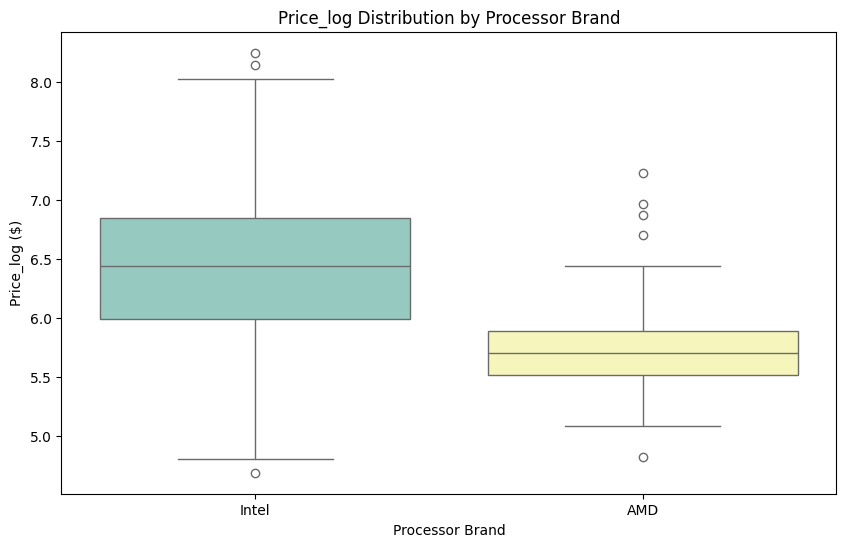

In [ ]:
# Box plot to compare prices between Intel and AMD processors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Processor_Brand', y='Price_log', data=df, palette='Set3')
plt.title('Price_log Distribution by Processor Brand')
plt.xlabel('Processor Brand')
plt.ylabel('Price_log ($)')
plt.show()


5. Are laptops with SSD more expensive than those with HDD, or do they often coexist?


In [ ]:
# Convert relevant columns to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['SSD'] = pd.to_numeric(df['SSD'], errors='coerce')
df['HDD'] = pd.to_numeric(df['HDD'], errors='coerce')

# Create a new column for storage type
def storage_type(row):
    if row['SSD'] > 0 and row['HDD'] > 0:
        return 'Both'
    elif row['SSD'] > 0:
        return 'SSD'
    elif row['HDD'] > 0:
        return 'HDD'
    else:
        return 'Others'

df['Storage_Type'] = df.apply(storage_type, axis=1)

# Drop rows with NaN values in relevant columns
df.dropna(subset=['Price', 'Storage_Type'], inplace=True)

# Verify the categorization
print(df['Storage_Type'].value_counts())


Storage_Type
SSD       625
HDD       367
Both      196
Others     83
Name: count, dtype: int64


In [ ]:
# Calculate mean prices for each storage type
mean_prices_by_storage = df.groupby('Storage_Type')['Price'].mean()

print("Mean prices by storage type:")
print(mean_prices_by_storage)


Mean prices by storage type:
Storage_Type
Both      1014.326531
HDD        412.836022
Others     345.997831
SSD        826.051024
Name: Price, dtype: float64


<ipython-input-58-9473d9ae67c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Storage_Type', y='Price_log', data=df, palette='Set3')


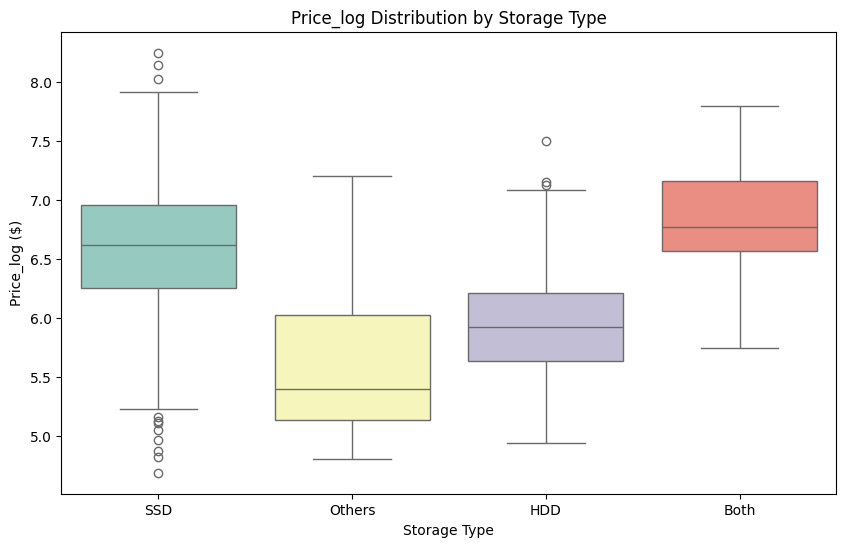

In [ ]:
# Box plot to compare prices among different storage types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Storage_Type', y='Price_log', data=df, palette='Set3')
plt.title('Price_log Distribution by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Price_log ($)')
plt.show()


<ipython-input-59-185458a3540f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Storage_Type', y='Price_log', data=df, palette='Set3')


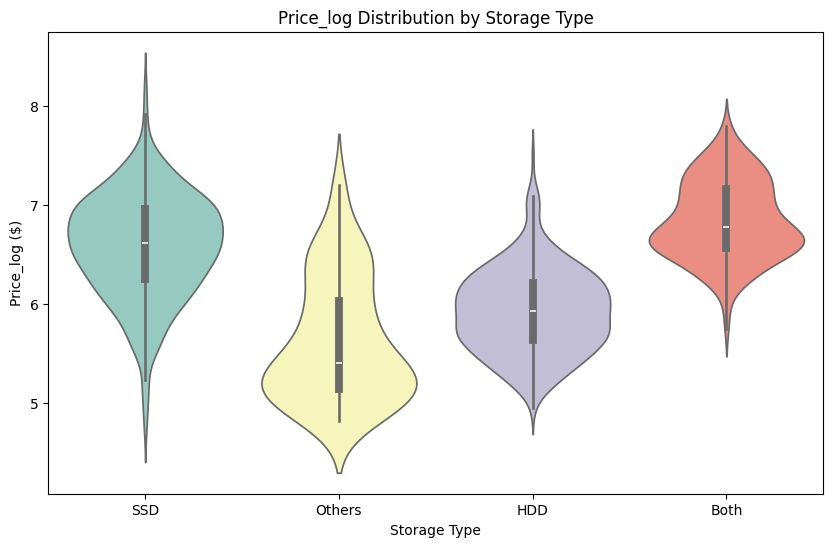

In [ ]:
# Violin plot to compare prices among different storage types
plt.figure(figsize=(10, 6))
sns.violinplot(x='Storage_Type', y='Price_log', data=df, palette='Set3')
plt.title('Price_log Distribution by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Price_log ($)')
plt.show()


<ipython-input-60-e4d459e2c0dc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Storage_Type', y='Price_winsorized', data=df, palette='Set3')


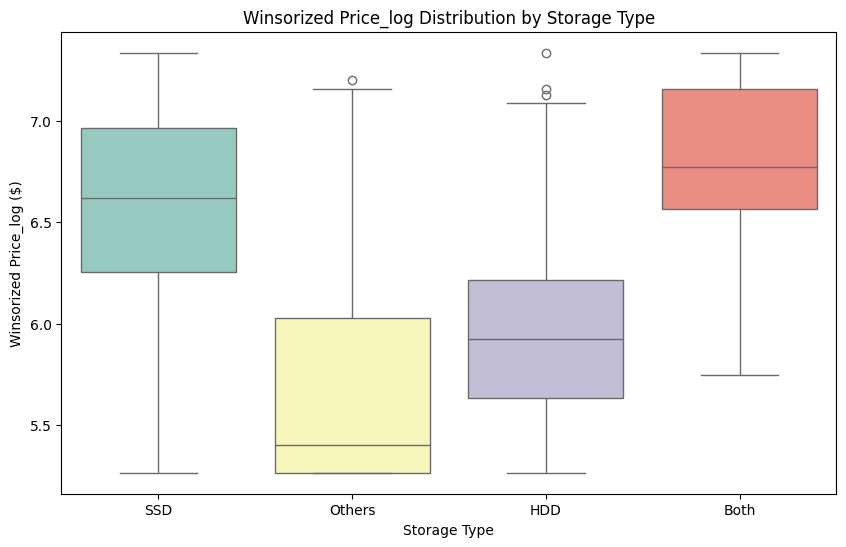

In [ ]:
from scipy.stats.mstats import winsorize

# Apply winsorizing to the Price column
df['Price_winsorized'] = winsorize(df['Price_log'], limits=[0.05, 0.05])

# Box plot to compare winsorized prices among different storage types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Storage_Type', y='Price_winsorized', data=df, palette='Set3')
plt.title('Winsorized Price_log Distribution by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Winsorized Price_log ($)')
plt.show()


6. How does the ppi (pixels per inch) influence price?


<ipython-input-61-2fd2ece5c1cb>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_log_by_ppi = df.groupby('PPI_Category')['Price'].mean().reset_index()
<ipython-input-61-2fd2ece5c1cb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PPI_Category', y='Price', data=mean_price_log_by_ppi, palette='Set3')


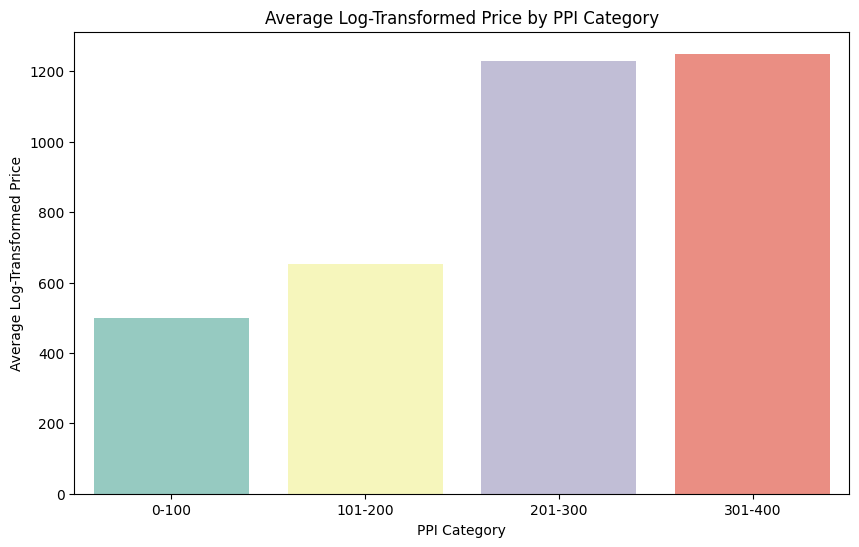

In [ ]:
# Create PPI bins
ppi_bins = pd.cut(df['ppi'], bins=[0, 100, 200, 300, 400], labels=['0-100', '101-200', '201-300', '301-400'])

# Add the PPI bins to the DataFrame
df['PPI_Category'] = ppi_bins

# Calculate the mean Price_log for each PPI category
mean_price_log_by_ppi = df.groupby('PPI_Category')['Price'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='PPI_Category', y='Price', data=mean_price_log_by_ppi, palette='Set3')
plt.title('Average Log-Transformed Price by PPI Category')
plt.xlabel('PPI Category')
plt.ylabel('Average Log-Transformed Price')
plt.show()
